# Library Management

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib import request
import tarfile

from sklearn.model_selection import train_test_split

# Dataset Loading

In [2]:
os.makedirs('/dataset', exist_ok = True)
os.makedirs('/viz', exist_ok = True)

In [3]:
url = "https://github.com/ageron/data/raw/main/housing.tgz"
tgz_path = 'datasets/housing.tgz'

In [4]:
request.urlretrieve(url, tgz_path)

('datasets/housing.tgz', <http.client.HTTPMessage at 0x21499b08b00>)

In [5]:
housing_zip  = tarfile.open(tgz_path)
housing_zip.extractall(path = '/datasets/housing')
housing_zip.close()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_9120\876444638.py:2: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_zip.extractall(path = '/datasets/housing')


In [6]:
housing = pd.read_csv('datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Basic data check

In [7]:
housing.info()

# total_bedroom has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


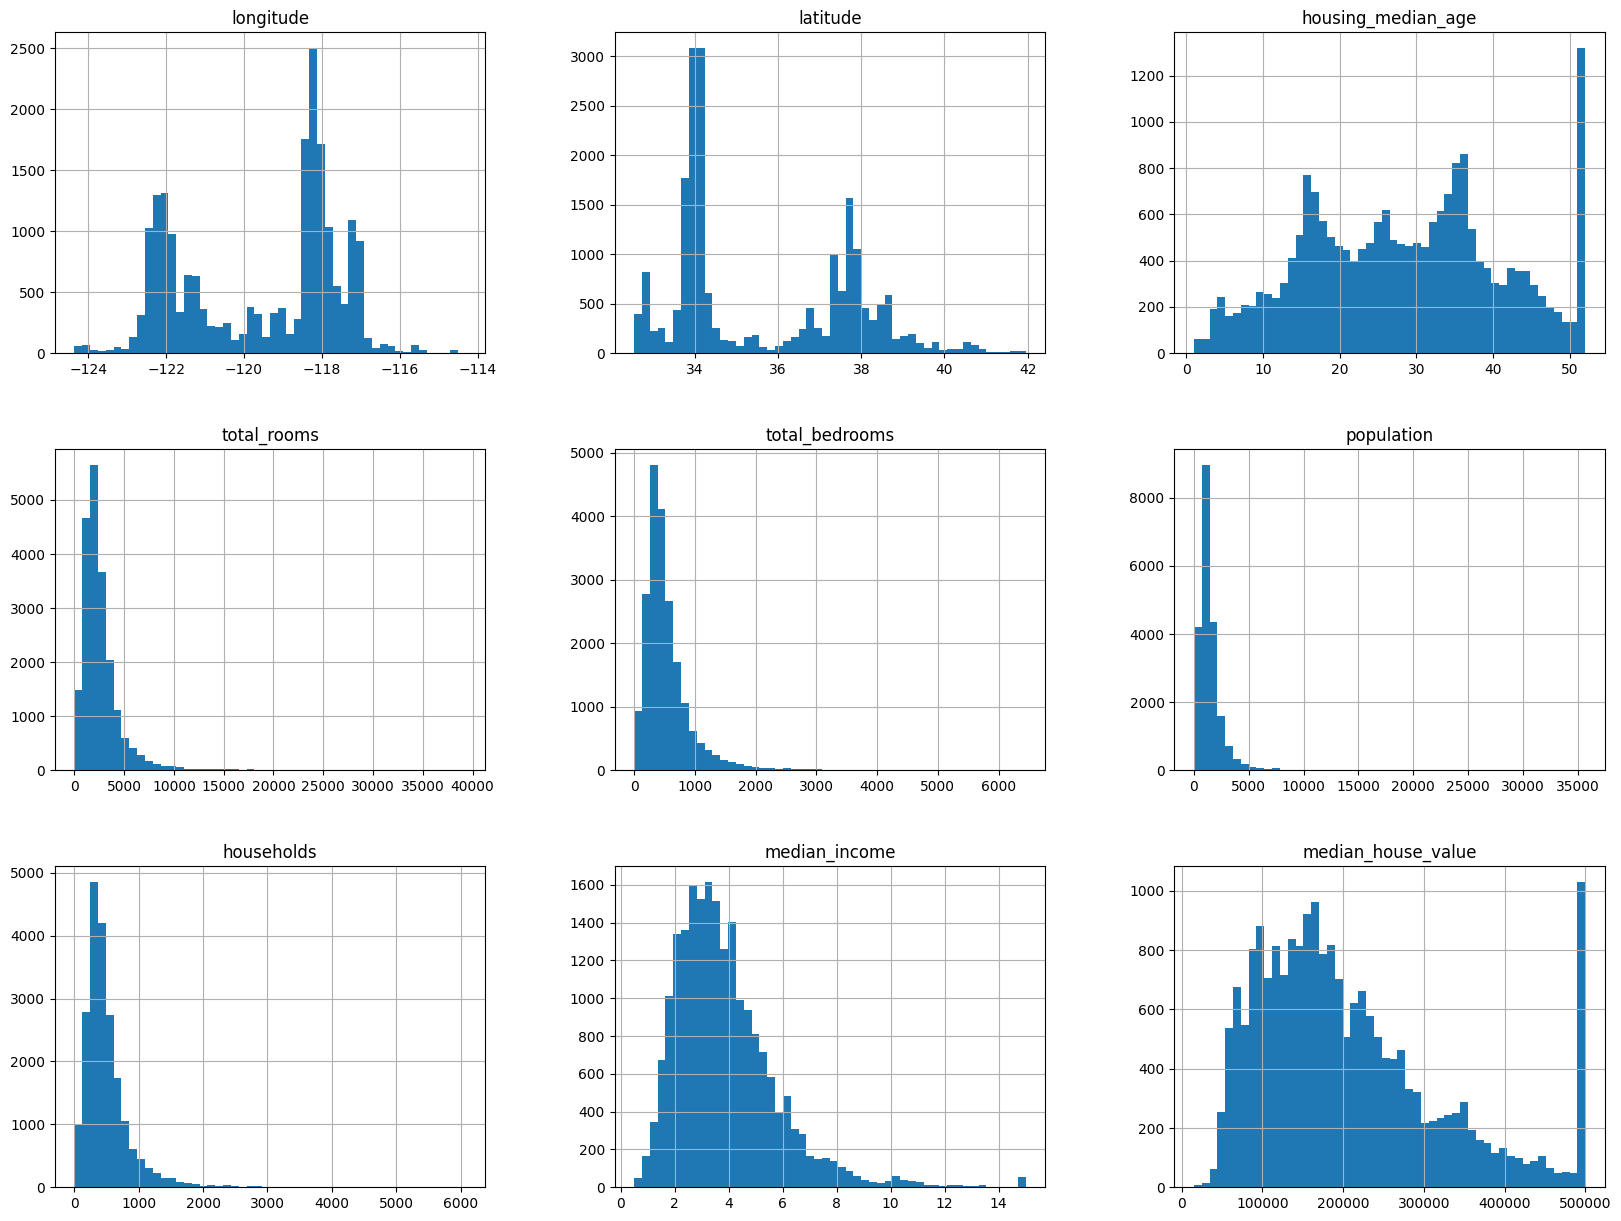

<Figure size 640x480 with 0 Axes>

In [8]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

plt.savefig('viz/housing_histogram.png', dpi = 400)


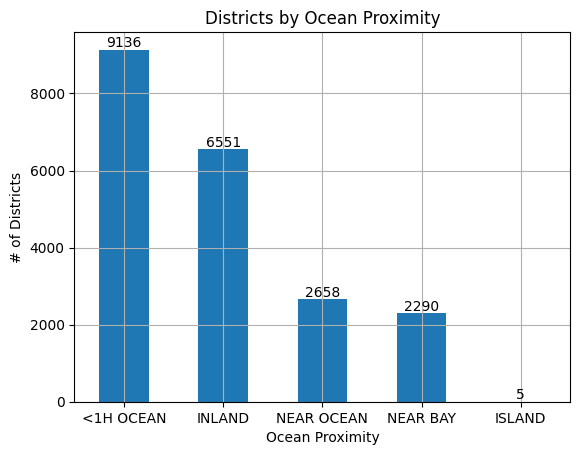

In [9]:
ax = housing['ocean_proximity'].value_counts().plot(kind = 'bar', grid = True)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Districts by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('# of Districts')
plt.xticks(rotation = 0)

plt.show()

In [10]:
housing['income_cat'] = pd.cut(housing['median_income'], 
       bins = [0,1.5,3,4.5,6, np.inf], 
       labels = [1,2,3,4,5])

Text(0, 0.5, '# of Districts')

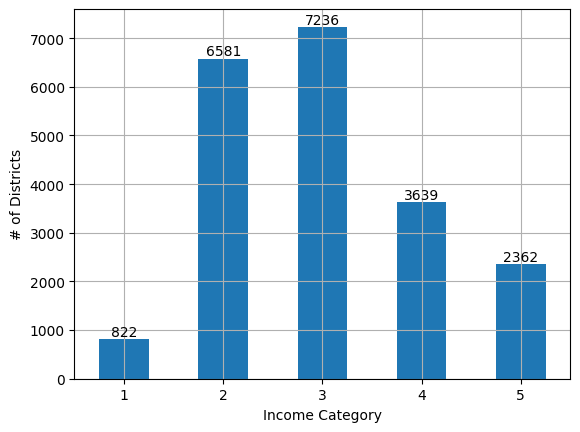

In [11]:
ax =  housing['income_cat'].value_counts().sort_index().plot(kind = 'bar', rot = 0, grid=True)

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Income Category')
plt.ylabel('# of Districts')

In [12]:
housing['income_cat'].value_counts().sort_index() / len(housing)

income_cat
1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: count, dtype: float64

# Split the dataset into train and test to reduce bias

In [13]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [14]:
strat_train_set, strat_test_set = train_test_split(housing, stratify = housing['income_cat'], test_size = 0.2, random_state = 42)

In [15]:
strat_train_set['income_cat'].value_counts().sort_index() / len(strat_train_set)

income_cat
1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: count, dtype: float64

In [16]:
def income_cat_proportions(data):
    prop = round(data['income_cat'].value_counts().sort_index() / len(data) * 100,2)
    return prop

compare_prop = pd.DataFrame({
    'Overall %': income_cat_proportions(housing),
    'Stratified %': income_cat_proportions(strat_train_set),
    'Random %': income_cat_proportions(train_set)
    })

compare_prop['Delta Stratified %'] = compare_prop['Stratified %'] - compare_prop['Overall %']
compare_prop['Delta Random %'] = compare_prop['Random %'] - compare_prop['Overall %']

compare_prop

,Overall %,Stratified %,Random %,Delta Stratified %,Delta Random %
income_cat,,,,,
1,3.98,3.98,3.92,0.00,-0.06
2,31.88,31.89,32.17,0.01,0.29
3,35.06,35.06,35.19,0.00,0.13
4,17.63,17.63,17.44,0.00,-0.19
5,11.44,11.45,11.28,0.01,-0.16


In [17]:
for set in (strat_train_set, strat_test_set, train_set):
    set.drop('income_cat', axis = 1, inplace = True)

In [18]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


In [19]:
housing = strat_train_set.copy()

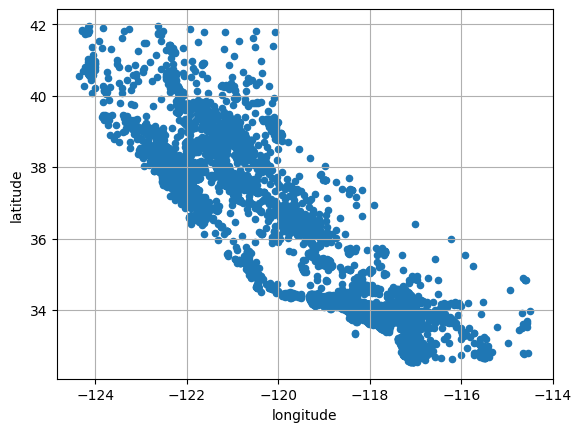

In [20]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True)
plt.show()

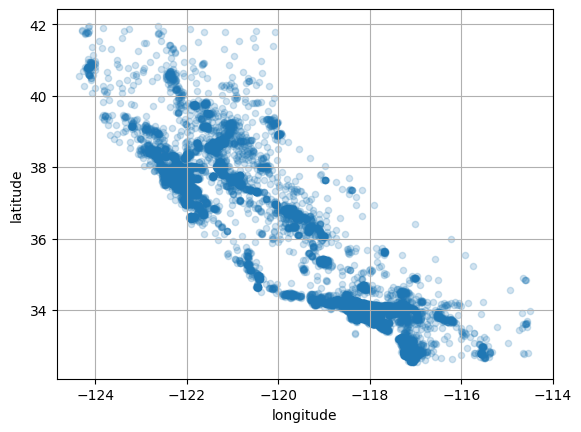

In [21]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show()

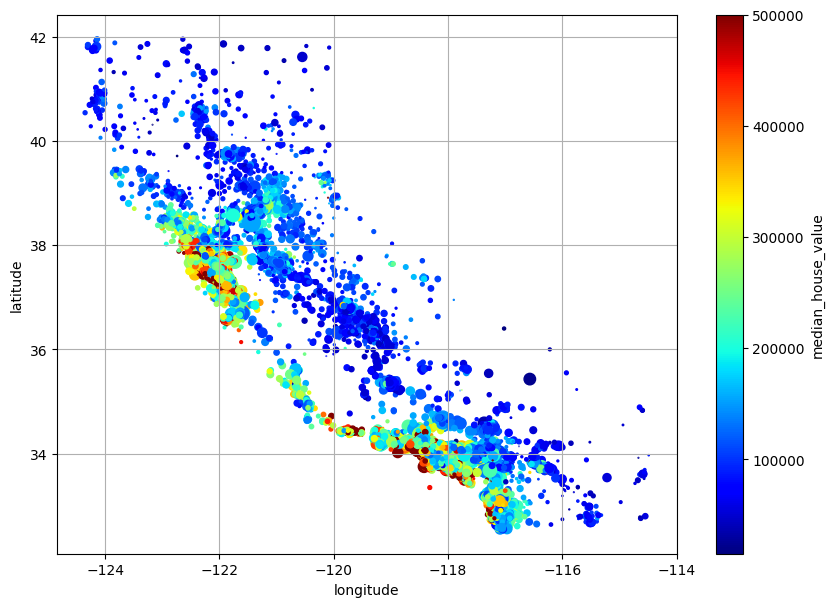

In [22]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', 
             c = 'median_house_value', s = housing['population'] / 100,
             cmap = 'jet', colorbar = True,
             grid = True, sharex = True ,figsize = (10,7))

plt.show()

In [23]:
corr_matrix = housing.corr(numeric_only=True)

In [24]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [25]:
corr_matrix.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

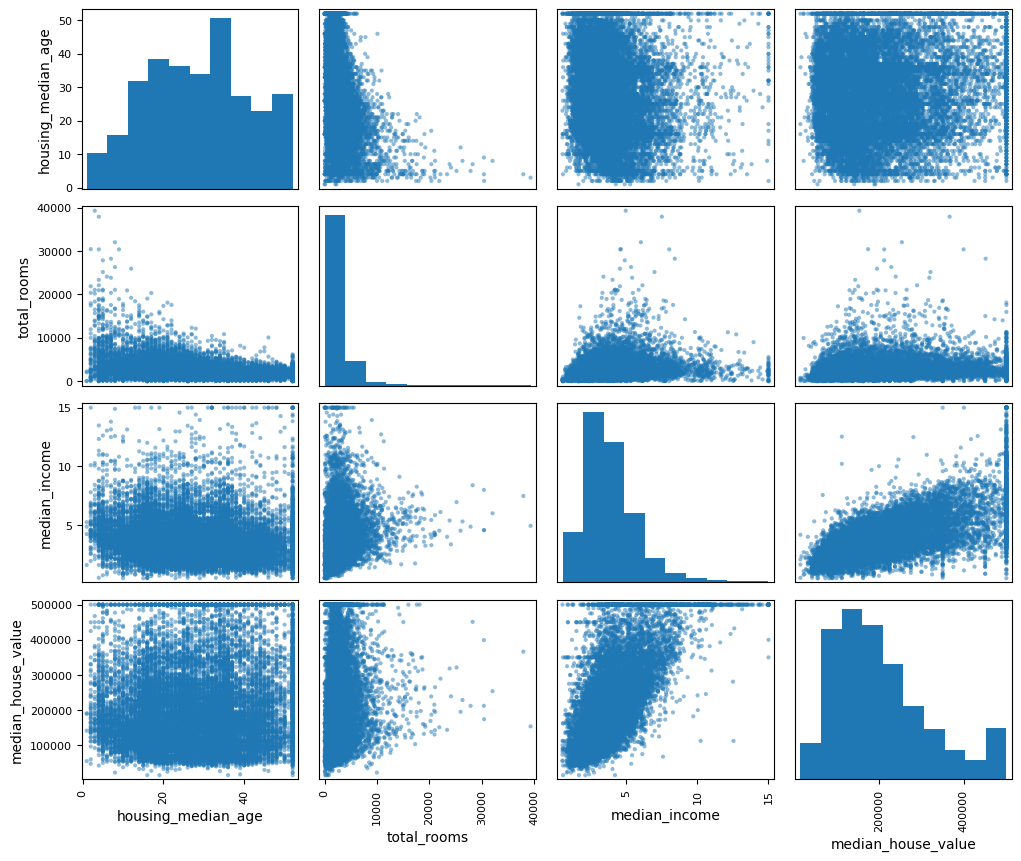

In [26]:
numeric_col = [ 'housing_median_age', 'total_rooms', 
               'median_income','median_house_value']

from pandas.plotting import scatter_matrix

scatter_matrix(housing[numeric_col], figsize = (12,10))

plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

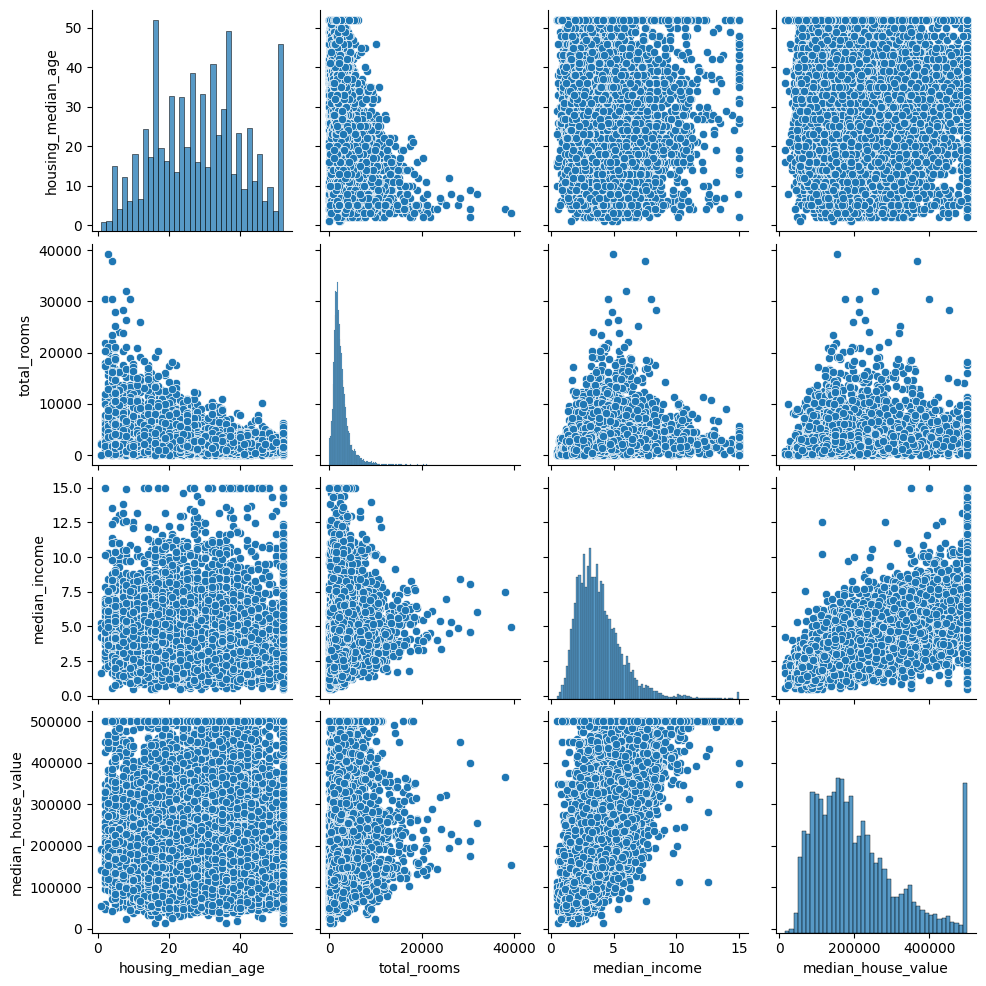

In [27]:
sns.pairplot(housing[numeric_col])

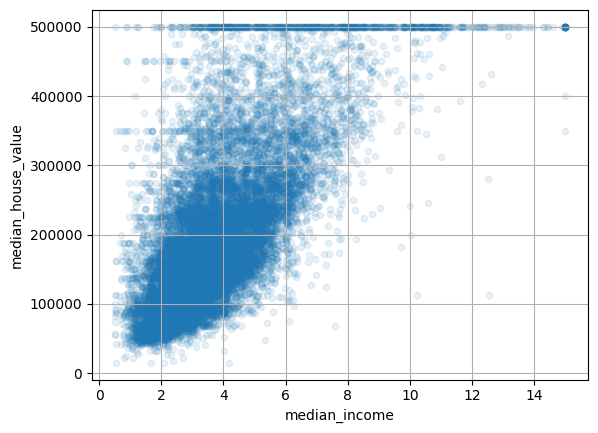

In [28]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value',
             alpha = 0.1, grid = True,)

plt.show()

In [29]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_household'] = housing['population'] / housing['households'] 

In [30]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.688380
rooms_per_household     0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
people_per_household   -0.038224
longitude              -0.050859
latitude               -0.139584
bedrooms_per_room      -0.256397
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

# Clean Data

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [33]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [35]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [36]:
X = imputer.transform(housing_num)

In [37]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, 
                          index = housing_num.index)

In [38]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [39]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

# Handling Text and Categorical Attributes

In [40]:
housing_cat = housing[['ocean_proximity']]

In [41]:
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [42]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [44]:
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]], shape=(16512, 1))

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [47]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [48]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [50]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

# Feature Scaling and Transformation

In [51]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [52]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

# Pipeline

# Select and Train Model

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
lin_reg.fit(housing, housing_labels)

ValueError: could not convert string to float: 'NEAR BAY'

In [80]:
housing_predictions = lin_reg.predict(housing)

ValueError: could not convert string to float: 'NEAR BAY'

In [67]:
housing_predictions[:5]

array([275731.11448447, 331676.57911293, 137497.17946945, 126904.73895816,
       302837.631101  ])

In [68]:
housing_labels[:5]

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [71]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse

4786992864.214438

In [74]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [75]:
tree_reg.fit(housing_tr, housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
housing_predictions = tree_reg.transform(housing_tr)